In [106]:
import pandas as pd
import torch
import string
import numpy as np
import re

# Function to clean words by removing special characters
def clean_word(word):
    # Remove anything that's not a letter (a-z) or dot (.), and convert to lowercase
    return re.sub(r'[^a-z]', '', word.lower())

# Load the dataset
data = pd.read_csv('dataset/pokemon.csv')["name"]
words = data.to_list()
words = list(map(clean_word, words[:100]))

In [107]:
len(words)

100

In [108]:
char_set = list(string.ascii_lowercase)
char_dict = {char: idx for idx, char in enumerate(char_set)}
char_dict

{'a': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'j': 9,
 'k': 10,
 'l': 11,
 'm': 12,
 'n': 13,
 'o': 14,
 'p': 15,
 'q': 16,
 'r': 17,
 's': 18,
 't': 19,
 'u': 20,
 'v': 21,
 'w': 22,
 'x': 23,
 'y': 24,
 'z': 25}

In [109]:
#one hot encoding
def one_hot_encode_word(word):
    one_hot_encoded = []
    for char in word:
        one_hot_vector = np.zeros(len(char_set))
        if char in char_dict:
            one_hot_vector[char_dict[char]] = 1
        one_hot_encoded.append(one_hot_vector)
    
    # Sum along the character axis to get a single 1D vector for each word
    return np.sum(one_hot_encoded, axis=0)


In [110]:
one_hot_encode_word('bulbasaur')

array([2., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 1., 0., 2., 0., 0., 0., 0., 0.])

In [111]:
# Encode all Pokémon names
encoded_pokemon = np.array([one_hot_encode_word(word) for word in words])

(100, 26)


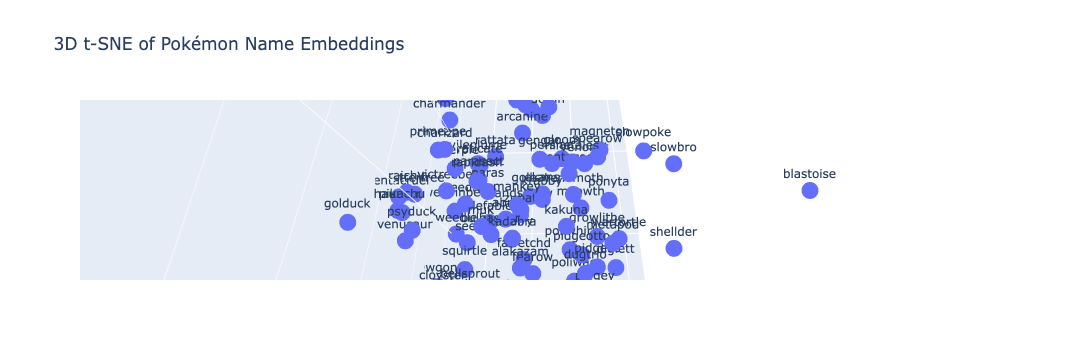

In [115]:
# Dimensionality reduction using t-SNE for 3D visualization
import plotly.express as px

# Flatten the one-hot encoded arrays into a 2D array
flattened_encoded_pokemon = encoded_pokemon.reshape(len(words), -1)  # Reshape to (number of Pokémon, max_length * number of characters)

# Check the shape of the flattened result
print(flattened_encoded_pokemon.shape)  # Should be (number of words, max_length * number of characters)

# Dimensionality reduction using t-SNE for 3D visualization
tsne = TSNE(n_components=3, perplexity=3, random_state=42)
pokemon_tsne_3d = tsne.fit_transform(flattened_encoded_pokemon)

# Create a DataFrame for Plotly visualization
df = pd.DataFrame(pokemon_tsne_3d, columns=['Component 1', 'Component 2', 'Component 3'])
df['Pokémon'] = words  # Add Pokémon names for labeling

# 3D Scatter Plot using Plotly Express
fig = px.scatter_3d(
    df, 
    x='Component 1', 
    y='Component 2', 
    z='Component 3', 
    text='Pokémon',  # Display Pokémon names
    title='3D t-SNE of Pokémon Name Embeddings',
    height=600
)

fig.update_traces(marker_size=10)
fig.update_layout(scene=dict(
    xaxis_title='TSNE Component 1',
    yaxis_title='TSNE Component 2',
    zaxis_title='TSNE Component 3',
))

fig.show()

In [117]:
df.to_csv('pokemon-3d-visualization/pokemon_tsne_data_one_hot.csv', index=False)